# Introduction to Text Processing
## Reintroduction to Strings
Before beginning with text processing in full, we will review and introduce several important topics in working with strings.
### String Attributes
Let's quickly review some useful features of strings.

In [1]:
## Strings, demarcated by single or double quotation markers, can be
## joined together by the addition operator. They may also be combined
## across multiple lines with the paranthesis. Be sure not to add 
## commas, or it will be interpreted as a tuple!

example_string = ('With educated people, I suppose, punctuation is a matter of rule; '
                  'with me it is a matter of feeling. But I must say I have a great '
                  'respect for the semi-colon; its a useful little chap.')
print(example_string)

With educated people, I suppose, punctuation is a matter of rule; with me it is a matter of feeling. But I must say I have a great respect for the semi-colon; its a useful little chap.


In [2]:
## Strings have a number of useful attributes for identifying features of 
## their content.
print('Is "comma" in string?: %s' %('orangutan' in example_string) )
print('Number of "a"s in string?: %s' %example_string.count('a'))
print('Index of "respect" in string?: %s' %example_string.index('respect'))

Is "comma" in string?: False
Number of "a"s in string?: 12
Index of "respect" in string?: 131


In [3]:
## Strings have a number of useful attributes for manipulating their content.
print(example_string.lower())

with educated people, i suppose, punctuation is a matter of rule; with me it is a matter of feeling. but i must say i have a great respect for the semi-colon; its a useful little chap.


In [4]:
## Strings have a number of useful attributes for manipulating their content.
print(example_string.replace('educated','obnoxious'))

With obnoxious people, I suppose, punctuation is a matter of rule; with me it is a matter of feeling. But I must say I have a great respect for the semi-colon; its a useful little chap.


In [5]:
## Strings even have functions to break down and recombine their constituents.
split_string = example_string.split(' ')
sort_string = ' '.join(sorted(split_string))

print(split_string)
print(sort_string)

['With', 'educated', 'people,', 'I', 'suppose,', 'punctuation', 'is', 'a', 'matter', 'of', 'rule;', 'with', 'me', 'it', 'is', 'a', 'matter', 'of', 'feeling.', 'But', 'I', 'must', 'say', 'I', 'have', 'a', 'great', 'respect', 'for', 'the', 'semi-colon;', 'its', 'a', 'useful', 'little', 'chap.']
But I I I With a a a a chap. educated feeling. for great have is is it its little matter matter me must of of people, punctuation respect rule; say semi-colon; suppose, the useful with


### Regular Expressions
Though the basic strings attributes are useful, they can be very clunky for certain tasks. For example, if we wanted to remove every punctuation in the string above, we would have to chain together multiple calls to the replace command. Similarly, if wanted to find every word ending with "ing", no command could give us an answer in one step (especially not with punctuation). 

We briefly introduce regular expressions, a mini-language used to interrogate strings, and highlight some use cases. The [documentation](https://docs.python.org/2/library/re.html) provides many more examples and details for usage.

In [6]:
import re    # Import the regular expressions package.

## Define pattern: string begins with "r". 
## To break it down, the pattern works in four parts:
## 1. "\W" specifies the pattern begins with any non-alphanumeric character.
## 2. "r" specifies that "r" should follow the space.
## 3. "[a-z]" specifies we're looking for any alphabetical character.
## 4. "*" specifies we're looking for any number of repeats of the previous.

pattern = '\Wr[a-z]*'
print( 'Find strings beginning with "r": %s' %re.findall(pattern,example_string) )

## Define pattern: string ends with "s" or "t".
## To break it down, the pattern works in five parts.
## 1. "\W" specifies the pattern begins with any non-alphanumeric character.
## 2. "[a-z]" specifies we're looking for any alphabetical character.
## 3. "*" specifies we're looking for any number of repeats of the previous.
## 4. "[st]" specifies we're looking for "s" or "t".
## 5. "\W" specifies the pattern ends with any non-alphanumeric character.

pattern = '\W[a-z]*[st]\W'
print( 'Find strings ending with "s" or "t": %s' %re.findall(pattern,example_string) )

Find strings beginning with "r": [' rule', ' respect']
Find strings ending with "s" or "t": [' is ', ' it ', ' must ', ' great ', ' its ']


In [7]:
import string

## Find all puncutation.
pattern = '[%s]' %string.punctuation

print(string.punctuation)
print( 'Find all punctuation: %s' %re.findall(pattern,example_string) )

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Find all punctuation: [',', ',', ';', '.', '-', ';', '.']


In [8]:
## Find all numeric characters.
pattern = '\d'
print('Find all numbers: %s' %re.findall(pattern, 'my favorite numbers are 4, 24, 48'))

Find all numbers: ['4', '2', '4', '4', '8']


We can also use regular expressions to find and replace multiple characters as once. This will form the basis of tokenization (discussed in greater detail below).

In [9]:
## Remove all punctation (i.e. replace with '')
pattern = '[%s]' %string.punctuation 
print(re.sub(pattern, '', example_string) )

With educated people I suppose punctuation is a matter of rule with me it is a matter of feeling But I must say I have a great respect for the semicolon its a useful little chap


### Reading and Writing Text Files
Though we have previously shown how to read and save datatables with Pandas, let's briefly discuss how to read and write text files with Python. To do this, we will use the **open** command.

In [10]:
## Open file for writing.
write_file = open('example_lincoln.txt', 'w')      # The 'w' stands for write.

## Write lines to file.
write_file.write( example_string + '\n' )  # We add a newline character.

## Close file for writing.
write_file.close()

We can also append to a previously written file. Notice the change in syntax below. Using the "with" command, we do not need to close the file. All code is executed under the "with" block and, once completed, the file is closed.

In [11]:
## Open file for appending.
with open('example_lincoln.txt', 'a') as append_file:
    
    append_file.write( re.sub(pattern, '', example_string) + '\n' ) # Append de-punctuated line.

We will now open the file for reading and print the lines in the file.

In [12]:
with open('example_lincoln.txt', 'r') as read_file:
    
    for line in read_file.readlines():
        
        print(line.strip())    # We use the "strip" attribute to remove whitespace/line breaks.

With educated people, I suppose, punctuation is a matter of rule; with me it is a matter of feeling. But I must say I have a great respect for the semi-colon; its a useful little chap.
With educated people I suppose punctuation is a matter of rule with me it is a matter of feeling But I must say I have a great respect for the semicolon its a useful little chap


## Dataset: NSF Awards (1970-2016)
The National Science Foundation (NSF) has made public the records of every award it has ever granted from 1970 onwards, including the awarding NSF division, the awarded institution, the amount awarded, and, most importantly, the abstract of the awardeed project. In this demonstration we will explore the temporal evolution of scientific topics, as well as the scientific topics that draw the most research funding from the NSF.

**NOTE:** The raw data (originally gathered from [here](https://www.nsf.gov/awardsearch/download.jsp)) are stored in XML format. Some code for parsing, reformatting, and saving XML data can be found in the 'nsf' folder in the *nsf_xml_parsing.ipynb* notebook.

Before turning to the text data, let's quickly characterize some trends in the funding data.

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
sns.set_style('white')
sns.set_context('notebook', font_scale=2.5)
%matplotlib inline

## Define years.
years = range(2006,2017)

## Iteratively load and concatenate grant dataframes.
grants = concat([read_csv(os.path.join('nsf',str(year),'grants.csv')) for year in years])

## Fix ID formatting (i.e. prepend 0s). Set as index.
grants.ID = grants.ID.apply(lambda i: '%0.7d' %i)
grants = grants.set_index('ID')

print(grants.shape)
grants.tail(2)

(136065, 7)


,Year,Title,Funds,Directorate,Division,Institution,State
ID,,,,,,,
1665537,2016,Current Trends in Dynamical Systems and Bowen'...,34000,Direct For Mathematical & Physical Scien,Division Of Mathematical Sciences,University of Washington,WA
1665539,2016,"Meeting: Phenome 2017, Tucson, Arizona",49505,Direct For Biological Sciences,Division Of Integrative Organismal Systems,American Society of Plant Biologists,MD


### Standardizing Variables: String Matching
Unfortuantely there are inconsistencies in the naming conventions in this dataset. For example, look at the following unique categories in Directorate. It is readily apparent that abbreviations were inconsently used and now certain directorates have multiple names despite the same identity (e.g. 'Direct For Computer & Info Scie & Enginr' and 'Directorate for Computer & Information Science & Engineering'). 

In [14]:
for title in np.unique( grants.dropna().Directorate ):
    print(title)

Direct For Biological Sciences
Direct For Computer & Info Scie & Enginr
Direct For Education and Human Resources
Direct For Mathematical & Physical Scien
Direct For Social, Behav & Economic Scie
Directorate For Engineering
Directorate For Geosciences
Directorate for Social, Behavioral & Economic Sciences
National Coordination Office
Natl Nanotechnology Coordinating Office
Office Of Information & Resource Mgmt
Office Of Polar Programs
Office Of The Director
Office of Budget, Finance, & Award Management


We could manually recode these items with a series of np.where commands, but there may be a more elegant solution with **string matching** techniques. String matching techniques attempt to characterize the similarity of two strings. There are a number of metrics for computing the difference between two strings ([Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance), [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance), [Damerau–Levenshtein distance](https://en.wikipedia.org/wiki/Damerau%E2%80%93Levenshtein_distance), [Jaro–Winkler distance](https://en.wikipedia.org/wiki/Jaro%E2%80%93Winkler_distance)), but here we will use a pre-installed module built into vanilla play: the **SequenceMatcher** command from difflib. 

From the SequenceMatcher docstring:
>SequenceMatcher is a flexible class for comparing pairs of sequences of any type. The basic algorithm dates back to Ratcliff's and Obershelp's "gestalt pattern matching". The basic idea is to find
the longest contiguous matching subsequence. The same idea is then applied recursively to the pieces of the sequences to the left and to the right of the matching subsequence.  This does not yield minimal edit sequences, but does tend to yield matches that "look right" to people.

We can use this algorithm to compute a similarity score between any two strings (e.g. directorate titles).

In [15]:
from difflib import SequenceMatcher

def similar(a,b):
    return SequenceMatcher(None, a, b).ratio()

print('Silly comparison 1: %0.3f' %similar('the cat in the hat', 'the bat in the vat)'))
print('Silly comparison 2: %0.3f' %similar('the cat in the hat', 'the dog on the log)'))

Silly comparison 1: 0.865
Silly comparison 2: 0.595


We will use this algorithm to find the most likely replacements for the abbreviated titles.

In [16]:
## Extract titles.
titles_abbr = [d for d in grants.dropna().Directorate.unique() if d.startswith('Direct ')]
titles_full = [d for d in grants.dropna().Directorate.unique() if not d.startswith('Direct ')]

## Iteratively identify most similar string.
abbr_dict = dict()
for abbr in titles_abbr:
    abbr_dict[abbr] = titles_full[np.argmax([similar(abbr, full) for full in titles_full])]
    
## Print.
for abbr, full in abbr_dict.items():
    print('%s --> %s' %(abbr,full))

Direct For Mathematical & Physical Scien --> Directorate for Social, Behavioral & Economic Sciences
Direct For Education and Human Resources --> Office Of Information & Resource Mgmt
Direct For Social, Behav & Economic Scie --> Directorate for Social, Behavioral & Economic Sciences
Direct For Biological Sciences --> Directorate For Geosciences
Direct For Computer & Info Scie & Enginr --> Directorate for Social, Behavioral & Economic Sciences


Perfect matches! We will use this information to update the DataFrame.

In [17]:
## Update directorates.
for abbr, full in abbr_dict.items():
    grants.loc[grants.Directorate==abbr,'Directorate'] = full
    
## Cheat a little.
grants.loc[grants.Directorate=='OFFICE OF THE DIRECTOR','Directorate'] = 'Office Of The Director'
grants.loc[grants.Directorate=='Directorate for Geosciences','Directorate'] = 'Directorate For Geosciences'

As can be seen below, we were successfully able to remove all of the duplicates by collapsing across identical directorates.

In [18]:
for title in np.unique( grants.dropna().Directorate ):
    print(title)

Directorate For Engineering
Directorate For Geosciences
Directorate for Social, Behavioral & Economic Sciences
National Coordination Office
Natl Nanotechnology Coordinating Office
Office Of Information & Resource Mgmt
Office Of Polar Programs
Office Of The Director
Office of Budget, Finance, & Award Management


### Trends: Total Grants by Year
The total number of grants has not changed much since the 70s.

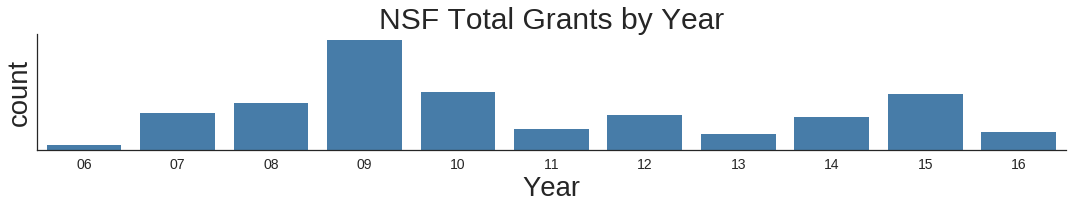

In [19]:
fig = plt.figure(figsize=(15,3))
ax = sns.countplot('Year', data=grants, color='#377eb8');
ax.set_xticklabels([str(y)[2:] for y in years], fontsize=14);
ax.set_yscale('log')
ax.set_title('NSF Total Grants by Year')
sns.despine()
plt.tight_layout()

### Trends: Total Funding by Year
Funding increased steadily until the [Great Recession (2008-2009)](https://www.nsf.gov/news/news_summ.jsp?cntn_id=129264), after which funding has steadily declined.

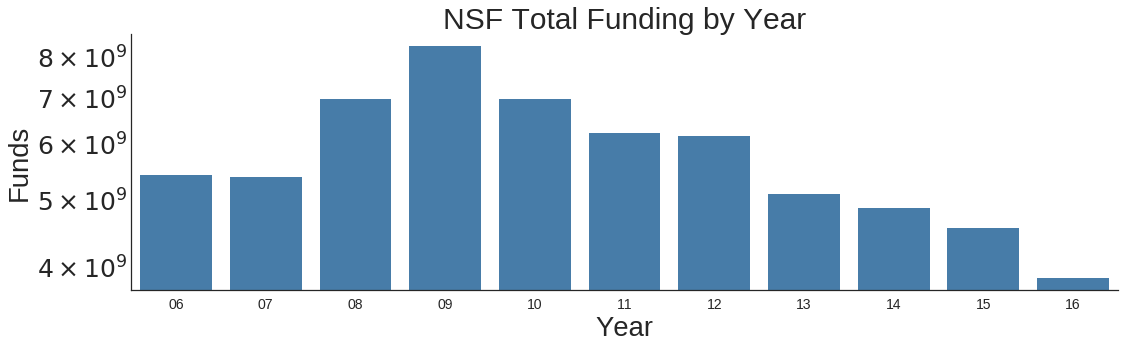

In [20]:
g = sns.factorplot('Year','Funds',data=grants,estimator=np.sum,ci=None, 
               kind='bar', color='#377eb8', size=5, aspect=3)
g.ax.set_xticklabels([str(y)[2:] for y in years], fontsize=14)
g.ax.set_yscale('log')
g.ax.set_title('NSF Total Funding by Year');

### Trends: Total Grants by Directorate

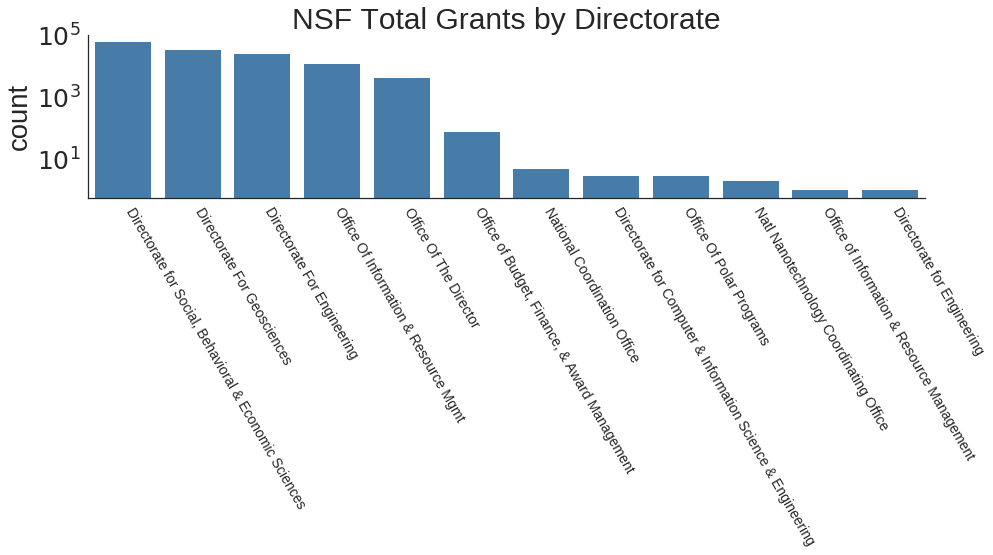

In [21]:
fig = plt.figure(figsize=(15,3))
order = grants.Directorate.value_counts().index
ax = sns.countplot('Directorate', data=grants, color='#377eb8', order=order);
ax.set_xticklabels(order,rotation=-60, ha='left', fontsize=14);
ax.set_xlabel('')
ax.set_yscale('log')
ax.set_title('NSF Total Grants by Directorate')
sns.despine()

### Trends: Average Awarded Amount by Directorate

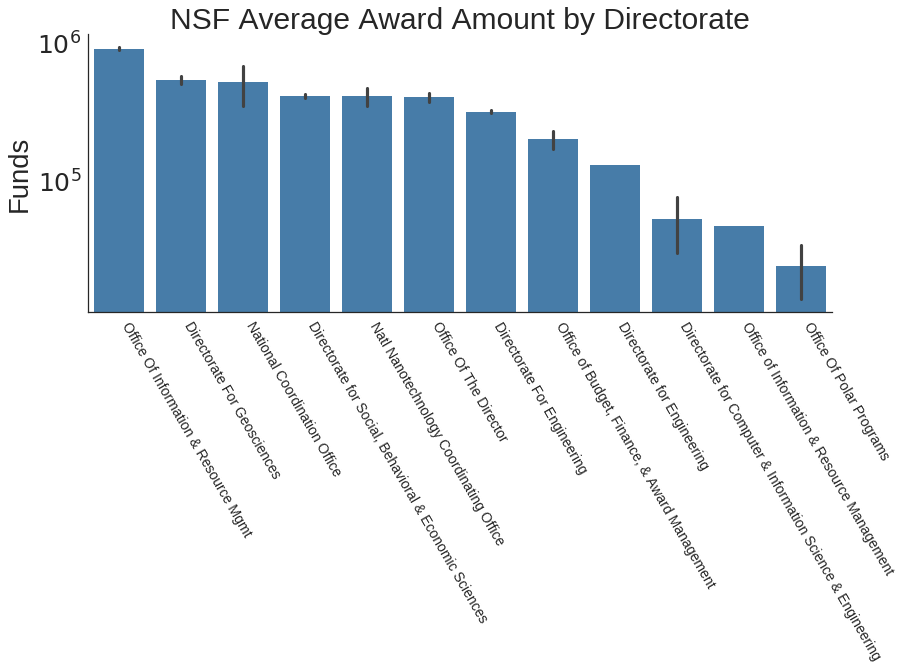

In [22]:
gb = grants.groupby('Directorate').Funds.mean()
factor_order = gb.index[np.argsort(gb)[::-1]]
g = sns.factorplot('Directorate','Funds',data=grants,estimator=np.mean,ci=68, 
                kind='bar', color='#377eb8', order=factor_order, size=5, aspect=3);
g.set_xticklabels(rotation=-60, ha='left', fontsize=14);
g.ax.set_xlabel('')
g.ax.set_yscale('log')
g.ax.set_title('NSF Average Award Amount by Directorate');

### Trends: Total Grants Awarded by Institution

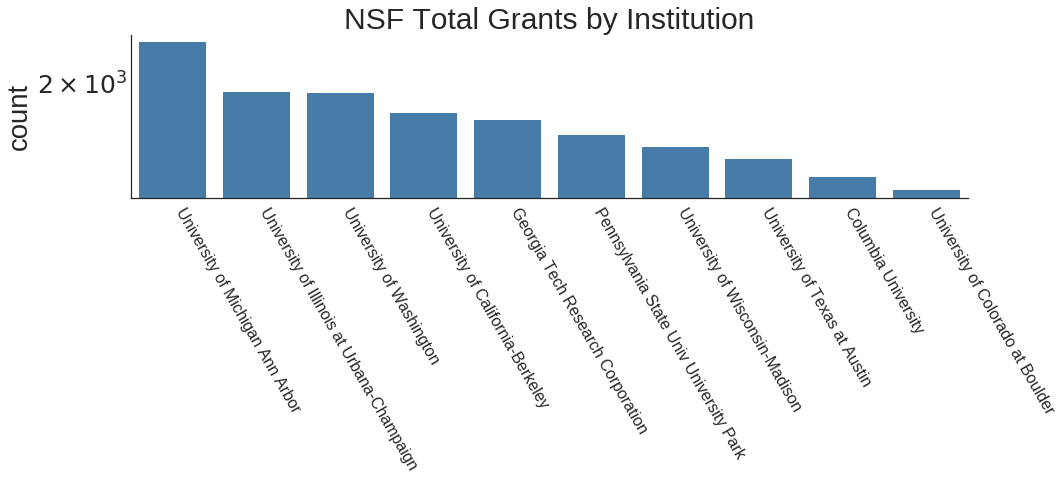

In [23]:
fig = plt.figure(figsize=(15,3))
order = grants.Institution.value_counts().index
ax = sns.countplot('Institution', data=grants, color='#377eb8', order=order[:10]);
ax.set_xticklabels(order,rotation=-60, ha='left', fontsize=16);
ax.set_xlabel('')
ax.set_yscale('log')
ax.set_title('NSF Total Grants by Institution')
sns.despine()

### Trends: Total Funding Awarded by Institution

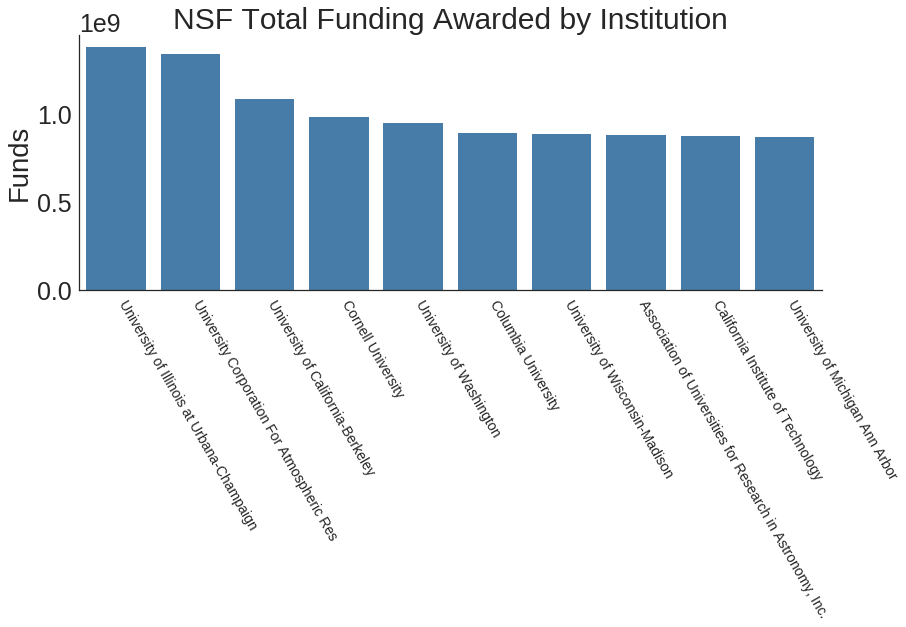

In [24]:
gb = grants.groupby('Institution').Funds.sum()
order = gb.index[np.argsort(gb)[::-1]]
g = sns.factorplot('Institution','Funds',data=grants,estimator=np.sum,ci=None, 
                kind='bar', color='#377eb8', order=order[:10], size=5, aspect=3);
g.set_xticklabels(rotation=-60, ha='left', fontsize=14);
g.ax.set_xlabel('')
g.ax.set_title('NSF Total Funding Awarded by Institution');

### Summary
A few general takeaways:
1. Though the total number of grants awarded by the NSF has not increased substantially over the past 4 decades, the total amount of funds allocated has steadily increased (up until the 2008-2009 recession at least). 
2. Not every Granting Directorate is equal: The Directorates of Mathematics, Physics, Engineering, and Biology award the most grants, whereas the Directorates of Scientific Coordination, Geosciences, and  Education award the most on average. The Directorate of Polar Research and Information Management consistently award the least and least often.
3. Large public research institutions (e.g. Berkeley, Michigan, Washington) have been awarded the most grants, but are not necessarily the most highly funded institutions. 

Let us see if the text information encoded in the abstracts can be used to predict research funding, as well as if certain words predict different Directorates/Institutions.

## Natural Language Processing
In the next section we will cover a summary of the steps involved in setting up a preprocessing pipeline for natural language processing tasks. Specifically, we will cover issues concerning text encoding, tokenizing, spell checking, stopwords, and stemming/lemanization. We will a simple pipeline and apply it to the abstracts of NSF awarded grants. 

**NOTE:** The abstracts for each year are stored in the *abstracts.txt* file in its corresponding  directory organized by year. Within a file, abstracts are separated by line with its corresponding ID at the beginning of the line.

### Text Encoding
The first major hurdle in text processing is identifying the text encoding of the file. The encoding is the machine language detailing how the text is represented under-the-hood. Without specifying the correct encoding, the text cannot be recovered. 

Fortunately, our abstract data has been encoded in the universal UTF-8. For files not encoded as such, however, the **codecs** module can be used to read and decode files of alternate encodings. To show how this goes wrong, we will try opening a file encoded in UTF-16.

In [26]:
import codecs

## Open file with UTF-8 encoding.
with codecs.open('example_utf16.txt', 'r', encoding='utf-8') as f:
    line = f.readline()
    
print(abstract)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

This is easily fixed when we specify the correct encoding.

In [27]:
## Open file with UTF-16 encoding.
with codecs.open('example_utf16.txt', 'r', encoding='utf-16') as f:
    line = f.readline()
    
print(line)

This file encoded in utf-16.﻿



For the purposes of our demonstration, we will use the first abstract from 2016. Abstracts are stored with their IDs line-by-line. IDs are tab-separated from their corresponding abstract. 

In [28]:
## Open 2016 abstracts document and read first line (i.e. first abstract).
with codecs.open(os.path.join('nsf','2016','abstracts.txt'), 'r', encoding='utf-8') as f:
    abstract = f.readline()
    
## Separate ID and abstract.
id, abstract = abstract.split('\t')

## Use regular expressions to remove any remaining XML paragraph break tags.
pattern = '<br/>'
abstract = re.sub(pattern, '', abstract)

print(abstract)

This mathematics research project concerns the areas of analysis, geometry, and dynamics, which are central to mathematics and crucial to other scientific fields, such as engineering, biology, and economics. For example, the mathematical modeling of any phenomenon that undergoes change over time (such as the population of bacteria in a body, the stock market, etc.) can be viewed as a dynamical system. Similarly, geometry is the basis for many current industrial applications such as 3D printing. This project will enhance the tools available in these branches of mathematics. The development of geometry goes back to the ancient Greeks, who laid down axioms, or basic assumptions, from which other reasonable properties could be logically deduced. The main focus of this project is a detailed study of certain phenomena that occur when the Archimedean axiom, attributed to Archimedes of Syracuse, is no longer valid. The resulting mathematics turns out to be useful even when the primary object o

### Tokenizing
The next step is breaking down the abstract into its constituent elements, i.e. words. We do this using the tokenizing function from the Natural Language Toolkit (NLTK). The NLTK library is:
>... a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

In [29]:
import nltk
nltk.download_gui()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [30]:
## Define path for NLTK to search for tokenizer information.
nltk.data.path.append(os.path.abspath('nltk_data'))

The tokenizer accepts regular expression patterns in instructing it what text to preserve and what text to toss. Below we specify to only keep the alphabetic characters.

In [31]:
from nltk.tokenize import sent_tokenize

## Tokenize into sentences.
sentences = sent_tokenize( abstract )

for n, sentence in enumerate(sentences):
    print( '%s %s...' %(n,sentence[:70]) )

0 This mathematics research project concerns the areas of analysis, geom...
1 For example, the mathematical modeling of any phenomenon that undergoe...
2 can be viewed as a dynamical system....
3 Similarly, geometry is the basis for many current industrial applicati...
4 This project will enhance the tools available in these branches of mat...
5 The development of geometry goes back to the ancient Greeks, who laid ...
6 The main focus of this project is a detailed study of certain phenomen...
7 The resulting mathematics turns out to be useful even when the primary...
8 This research project will use techniques from non-Archimedean analysi...
9 The project makes use of Berkovich spaces, non-Archimedean analogues o...
10 One part of the project involves Calabi-Yau manifolds, geometric objec...
11 The principal investigator and collaborator will use non-Archimedean t...
12 Another part of the project is in arithmetic dynamics....
13 Given a discrete-time two-dimensional dynamical system d

In [32]:
from nltk.tokenize import RegexpTokenizer

## Define regex inclusion pattern. This pattern accepts
## all alphanumeric characters and the hyphen character.
regex = '[\w-]+'

## Initialize tokenizer with regular expression.
tokenizer = RegexpTokenizer(regex)

## Apply to sentences.
sentences = [tokenizer.tokenize(sentence) for sentence in sentences]

print(sentences[0])

['This', 'mathematics', 'research', 'project', 'concerns', 'the', 'areas', 'of', 'analysis', 'geometry', 'and', 'dynamics', 'which', 'are', 'central', 'to', 'mathematics', 'and', 'crucial', 'to', 'other', 'scientific', 'fields', 'such', 'as', 'engineering', 'biology', 'and', 'economics']


### Position Tagging
**Position tagging:** Position tagging is the linguistic process of identifying **parts of speech** (e.g. nouns, verbs, adjectives). NLTK has extensive [documentation](http://www.nltk.org/book/ch05.html) and has many useful tools for decomposing sentences into their respective lexical categories. With this approach, we could identify proper nouns in sentences (NP tag) and drop them. Unfortunately, position tagging is a non-trivial linguistic problem, with many corner cases and errors, and can also be computationally demanding. 

In [33]:
from nltk import pos_tag

## Define the positions of speech of the first sentence.
pos_tag(sentences[0])

[('This', 'DT'),
 ('mathematics', 'NNS'),
 ('research', 'NN'),
 ('project', 'NN'),
 ('concerns', 'VBZ'),
 ('the', 'DT'),
 ('areas', 'NNS'),
 ('of', 'IN'),
 ('analysis', 'NN'),
 ('geometry', 'NN'),
 ('and', 'CC'),
 ('dynamics', 'NNS'),
 ('which', 'WDT'),
 ('are', 'VBP'),
 ('central', 'JJ'),
 ('to', 'TO'),
 ('mathematics', 'NNS'),
 ('and', 'CC'),
 ('crucial', 'JJ'),
 ('to', 'TO'),
 ('other', 'JJ'),
 ('scientific', 'JJ'),
 ('fields', 'NNS'),
 ('such', 'JJ'),
 ('as', 'IN'),
 ('engineering', 'NN'),
 ('biology', 'NN'),
 ('and', 'CC'),
 ('economics', 'NNS')]

What do these tags mean? A full list [here](https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/).

|Class|Type|Tag|Example| 
|---|---|---|---|
|Noun|Singular<br/>Plural<br/>Proper (s)<br/>Proper (p)|NN<br/>NNS<br/>NNP<br/>NNPS|citizen<br/>citizens<br/>American<br/>Americans|
|Verb|Base<br/>Past<br/>Gerund<br/>Past participle<br/>Present|VB<br/>VBD<br/>VBG<br/>VBN<br/>VBP|take<br/>took<br/>taking<br/>taken<br/>take|
|Adjective|Base<br/>Comparative<br/>Superlative|JJ<br/>JJR<br/>JJS|big<br/>bigger<br/>biggest|
|Other|Conjunction<br/>Determiner<br/>Preposition|CC<br/>DD<br/>IN|and<br/>this, that<br/>in, of|

In [34]:
## Tokenize all sentences and store with associated POS.
tokens_pos = np.vstack([pos_tag(sentence) for sentence in sentences])

print(tokens_pos.shape)
print(tokens_pos[::15])

(309, 2)
[['This' 'DT']
 ['to' 'TO']
 ['example' 'NN']
 ['population' 'NN']
 ['dynamical' 'JJ']
 ['printing' 'NN']
 ['of' 'IN']
 ['from' 'IN']
 ['is' 'VBZ']
 ['Archimedes' 'NNP']
 ['even' 'RB']
 ['project' 'NN']
 ['of' 'IN']
 ['analogues' 'NNS']
 ['objects' 'NNS']
 ['use' 'VB']
 ['degenerate' 'VBP']
 ['Given' 'VBN']
 ['the' 'DT']
 ['problem' 'NN']
 ['of' 'IN']]


### Stop Words
One easy way to increase the informational content of your corpus is to remove highly common words (e.g. a, an, and, of, this, that, etc.). These are highly likely to appear in every documents and thus of little explanatory power. Many packages (NLTK, SpaCy, Scikit-Learn) have built-in **stop words**, or a list of the most frequently appearing words for a given language. Below we will use Scikit-Learn's list.

In [35]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = list(ENGLISH_STOP_WORDS)

print(stop_words[:20])

['mill', 'side', 'beyond', 'what', 'sixty', 'whatever', 'is', 'may', 'wherever', 'sincere', 'him', 'become', 'empty', 'which', 'full', 'am', 'could', 'any', 'same', 'therein']


We will apply the stoplist to our tokens using the in1d command from NumPy. After applying stopwords, the abstract is reduced by approximately 75 words.

In [36]:
## Define function to lowercase all strings.
lower = np.vectorize(lambda s: s.lower())

## Match all tokens in stoplist.
ix = np.in1d(np.apply_along_axis(lower, 0, tokens_pos[:,0]), stop_words)

## Remove all stopwords (i.e. those in tokens matching stopwords)
tokens_pos = tokens_pos[~ix]

print('Total tokens after stop words: %s' %len(tokens_pos))

Total tokens after stop words: 168


As a quick note, stoplists largely remove "glue" words (i.e. conjunctives, determiners, prepositions). We can confirm this by looking at the types of tags left over after applying the stop words. As can be seen below, what largely remains are nouns, verbs, adjectives, and adverbs.

In [37]:
print(np.unique(tokens_pos[:,1]))

['CD' 'JJ' 'NN' 'NNP' 'NNS' 'RB' 'RBR' 'VB' 'VBD' 'VBG' 'VBN' 'VBP' 'VBZ']


### Stemming and Lemmatization
A second way to increase the informational content of your corpus (though far less simple than utilizing stop words) is through stemming and lemmatizing your tokens. The [Stanford NLP group](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) provides the following definitions:
* **Stemming:** refers to a process that removes the ends of words, thereby reducing them to their stems. This most frequently includes the removal of derivational affixes (e.g. joyful --> joy).
* **Lemmatization:** refers to a process that converts words so as to remove inflectional endings only and to return the base or dictionary form of a word, i.e. its lemma (e.g. walks, walked, walking --> walk). 

There are several methods of stemming/lemmatizing implemented by different modules and functions. For example, NLTK and SpaCy both include stemming/lemmatizing functions which produce slightly different outputs. We provide examples of some differences below.

In [38]:
from pandas import DataFrame
from nltk.stem import LancasterStemmer, PorterStemmer, WordNetLemmatizer

## Seprate tokens from POS-tags.
tokens, tags = tokens_pos.T

## Initialize and vectorize functions.
ls = np.vectorize(LancasterStemmer().stem)
ps = np.vectorize(PorterStemmer().stem)
wnl = np.vectorize(WordNetLemmatizer().lemmatize)

## Apply and store outputs.
outputs = DataFrame(np.vstack([tokens, tags, np.apply_along_axis(ls, 0, tokens), 
                               np.apply_along_axis(ps, 0, tokens),
                               np.apply_along_axis(wnl, 0, tokens)]).T,
                     columns=('Token','Tag','Lancaster','Porter','WordNet'))

## Compare and print agreement.
for col in outputs.columns[2:]:
    print('%s agreement: %0.3f' %(col, (outputs['Token']==outputs[col]).mean()))
    
outputs.iloc[::12]

Lancaster agreement: 0.244
Porter agreement: 0.280
WordNet agreement: 0.810


,Token,Tag,Lancaster,Porter,WordNet
0,mathematics,NNS,mathem,mathemat,mathematics
12,fields,NNS,field,field,field
24,bacteria,NNS,bacter,bacteria,bacteria
36,3D,CD,3d,3D,3D
48,Greeks,NNP,greek,greek,Greeks
60,detailed,JJ,detail,detail,detailed
72,resulting,VBG,result,result,resulting
84,use,VB,us,use,use
96,project,NN,project,project,project
108,Calabi-Yau,NNP,calabi-yau,calabi-yau,Calabi-Yau


Each approach has its own strengths and weaknesses. The WordNetLemmatizer is the most conservative, largely only de-pluralizing certain noun tokens. LancasterStemmer is the most liberal in its pruning, ocassionally removing stems that change the word entirely (e.g. population --> pop, elementary --> el). The PorterStemmer seems to be somewhere in the middle, stemming many words without rendering them unintelligible (e.g. dimension --> dimensional, population --> popul). It is again worth emphasizing that there is no one correct solution and what will work best is very contingent on the corpus and goal of analysis.

In [39]:
## Extract all verbs from tokens.
verbs = tokens[[True if tag.startswith('V') else False for tag in tags]]

## Apply PorterStemmers to verbs.
verbs_ps = np.apply_along_axis(ps, 0, verbs)

print(verbs[::5])
print(verbs_ps[::5])

['concerns' 'goes' 'resulting' 'spaces' 'concerning' 'formulated']
['concern' 'goe' 'result' 'space' 'concern' 'formul']


In [40]:
## Extract all plural nouns from tokens.
nouns = tokens[[True if tag.startswith('N') and tag.endswith('S') else False for tag in tags]]

## Apply PorterStemmers to verbs.
nouns_wnl = np.apply_along_axis(wnl, 0, nouns)

print(nouns)
print(nouns_wnl)

['mathematics' 'areas' 'dynamics' 'mathematics' 'fields' 'economics'
 'bacteria' 'applications' 'tools' 'branches' 'mathematics' 'axioms'
 'assumptions' 'properties' 'phenomena' 'mathematics' 'techniques'
 'problems' 'dynamics' 'analogues' 'manifolds' 'manifolds' 'objects'
 'physics' 'techniques' 'families' 'manifolds' 'dynamics' 'polynomials'
 'coefficients' 'grows' 'orbits' 'dynamics' 'terms']
['mathematics' 'area' 'dynamic' 'mathematics' 'field' 'economics'
 'bacteria' 'application' 'tool' 'branch' 'mathematics' 'axiom'
 'assumption' 'property' 'phenomenon' 'mathematics' 'technique' 'problem'
 'dynamic' 'analogue' 'manifold' 'manifold' 'object' 'physic' 'technique'
 'family' 'manifold' 'dynamic' 'polynomial' 'coefficient' 'grows' 'orbit'
 'dynamic' 'term']


### Spell Checking
Though this step is not strictly necessary, and will not be used below, there are options for spell-checking in python. Peter Norvig has written an incredible [tutorial for spellchecking in python](http://norvig.com/spell-correct.html) to provide an intuition for how it is possible to write by hand with minimal code. We will instead cheat and use the **pyenchant** package, a spellchecking library in Python [(documentation)](https://pythonhosted.org/pyenchant/).

In [41]:
import enchant

## Define the language of use (i.e. American English).
## Possible languages include: English, German, French, and more.
spellcheck = enchant.Dict('en_US')

The *check* attribute will lookup a specified string to see if it is correctly spelled.

In [42]:
print( spellcheck.check('Hello') )
print( spellcheck.check('Helo') )

True
False


The *suggest* attribute will provide a list of possible correct spellings.

In [43]:
print( spellcheck.suggest('Helo') )

['He lo', 'He-lo', 'Hole', 'Help', 'Helot', 'Hello', 'Halo', 'Hero', 'Hell', 'Held', 'Helm', 'Heloise', 'Helios']


In our case, let's check to see which words it does not recognize. As can be seen, the spellchecker breaks down for proper nouns.

In [44]:
[s for s in tokens if not spellcheck.check(str(s))]

['3D',
 'Archimedean',
 'Archimedean',
 'non-Archimedean',
 'Berkovich',
 'non-Archimedean',
 'Calabi-Yau',
 'non-Archimedean',
 'Calabi-Yau',
 'Calabi-Yau',
 'Berkovich']

If we were to want to replace these with a suggested word, the recommended words for Archimedean are accurate; the first suggested word is its root, Archimedes. This is not terribly surprising given its status as a better-known proper noun.

In [45]:
spellcheck.suggest('Archimedean')

['Archimedes', 'Architectonic', 'Archipelago', 'Architecture']

Unfortunately Calabi (of the less frequently encountered [Calabi–Yau manifold](https://en.wikipedia.org/wiki/Calabi%E2%80%93Yau_manifold)) does not possess the same fame. It's top recommendation is calabash, "an evergreen tropical American tree that bears fruit in the form of large woody gourds."

In [46]:
spellcheck.suggest('Calabi')

['Calabash', 'Calaboose', 'Calais', 'Calamity']

### Putting it all together

## Machine Learning
It is easy to train the same sorts of machine learning models we previously encountered on text data. What is necessary, of course, is converting the text data into some numeric format for modeling purposes. Scikit-Learn has a number of functions for accomplishing this. 

### Rescaling Text Data, Part 1
The most straightforward way of rescaling text data to numeric format is to simply count the occurrence of words across documents. In doing so, we end up with an NxM matrix, where N is the number of documents and M is the number of unique tokens. The **CountVectorizer** class from Scikit-Learn performs just this function. Before applying CountVectorizer to the NSF data, let's first demonstrate its utility with a toy dataset.

Our dataset will consist of 20 features drawn from 2 categories: {A01, A02, A03, ..., A10} and {B01, B02, B03, ..., B10}. To generate this dataset, we will construct a transition matrix which dictates the probability of encountering, in a document, Token2 given Token1. The tokens from category A will have slightly higher probabilities towards other category A members, and likewise for category B. 

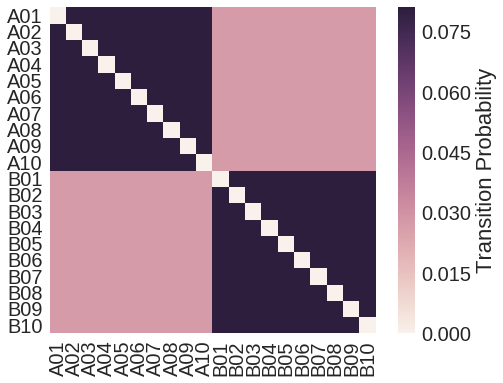

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

## Define homophily index.
hindex = 3.0

## Define tokens.
tokens = ['A%0.2d' %n for n in np.arange(10)+1] + ['B%0.2d' %n for n in np.arange(10)+1]

## Define transition probability matrix.
trans_mat = np.hstack( [np.ones((10,10))*hindex, np.ones((10,10))] )
trans_mat = np.vstack( [trans_mat, trans_mat[:, ::-1]] )
trans_mat[np.diag_indices_from(trans_mat)] = 0
trans_mat = np.apply_along_axis(lambda arr: arr / arr.sum(), 1, trans_mat)

## Plot.
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(trans_mat, square=True, xticklabels=tokens, yticklabels=tokens, 
                 cbar_kws={'label': 'Transition Probability'});

With this transition proability matrix generated, we will generate 100 documents by starting a document with each respective token and samping J new tokens based on a random integer generator.

In [48]:
np.random.seed(47404)

## Generate 100 random integers.
doc_lengths = np.random.randint(2,15,100)

## Generate documents.
documents = []
for token, doc_length in zip(tokens*5, doc_lengths):
    
    ## Initialize document.
    document = [token]
    
    ## Iteratively add tokens to document.
    while len(document) < doc_length:
        
        ix = tokens.index(document[-1])
        document.append( np.random.choice(tokens, 1, p=trans_mat[ix])[0] )
        
    ## Append document to documents.
    document = ' '.join(document)
    documents.append(document)

documents[:3]

['A01 A07 B02 B03 A08 A01 A09 A07 A06 A08 A10 A08 A07 B05',
 'A02 A07 A06 A09 A10 A08 B05 B07 B03 B10 A07',
 'A03 A10 B07 B01 B07 B06 B05 B09 B05 B06 B05 B04 B02']

We will use **CountVectorizer** to convert these documents into their numeric representation.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

## Initialize CountVectorizer class.
cvec = CountVectorizer(lowercase=False)

## Fit to documents.
cfit = cvec.fit(documents)
print(cfit.get_feature_names())

['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10']


In [50]:
## Use fit_transform to generate counts.
cmat = cvec.fit_transform(documents)
cmat

<100x20 sparse matrix of type '<class 'numpy.int64'>'
	with 690 stored elements in Compressed Sparse Row format>

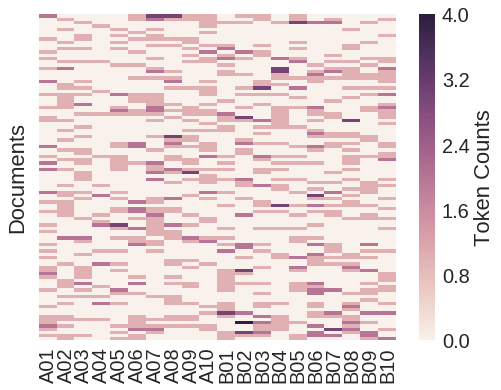

In [51]:
## Plot.
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cmat.toarray(), xticklabels=cfit.get_feature_names(), 
                 yticklabels='', cbar_kws={'label': 'Token Counts'});
ax.set_ylabel('Documents')

Average classification score: 0.68


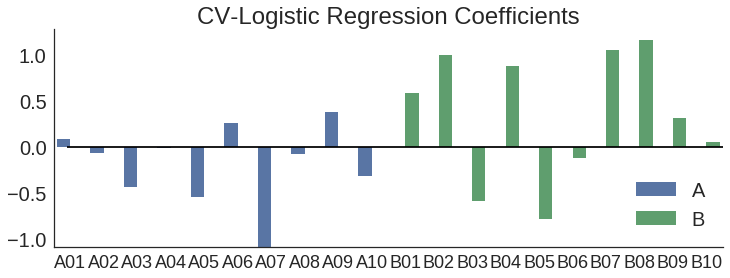

In [52]:
from pandas import DataFrame
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

## Define dependent variable.
y = np.array([0 if doc.startswith('A') else 1 for doc in documents])

## Initialize logistic regression w/ cross-validation class.
lrcv = LogisticRegressionCV(Cs=[1.], cv=5, random_state=0)

## Fit.
lrf = lrcv.fit(cmat, y)

## Print scores.
print('Average classification score: %0.2f' %lrf.scores_[1].mean()) 

## Plot coefficients.
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(cfit.get_feature_names(), lrf.coef_.flatten(), [token[0] for token in tokens])
ax.hlines(0,-0.1,20.1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_title('CV-Logistic Regression Coefficients')
sns.despine()

### Rescaling NSF Data
Using all abstracts between 2006 and 2016, let us attempt to predict Directorate category from the tokenized text alone. Just as before, the first step will be to perform frequency counts of the tokens within documents. 

To produce the frequency counts, we will still use CountVectorizer but we will initialize it to read data separated into files.

Because producing the CountVectorizer process can be computationally intensive, and thus slow, we have precumpted the sparse matrix. We will read it in and construct it using NumPy and SciPy.

In [53]:
import os
import numpy as np
from scipy.sparse import csr_matrix

## Load compressed numpy file.
npz = np.load(os.path.join('nsf','NSF_cvec.npz'))
features = npz['features']

## Build sparse matrix.
cmat = csr_matrix((npz['data'], npz['indices'], npz['indptr']), npz['shape'])
cmat

<134244x146663 sparse matrix of type '<class 'numpy.int64'>'
	with 16568090 stored elements in Compressed Sparse Row format>

Let's plot the distribution of tokens. 

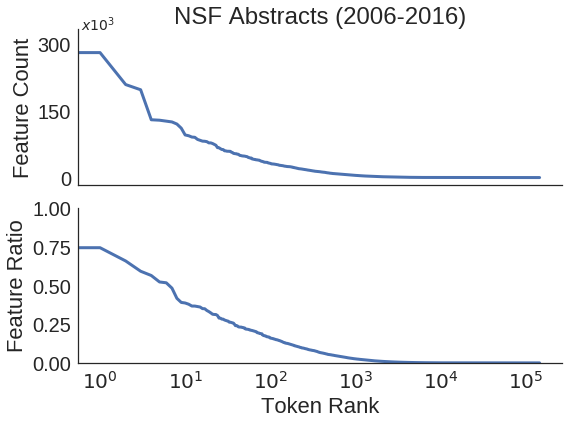

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

## Plot
fig, axes = plt.subplots(2,1,figsize=(8,6), sharex=True)

## Compute arrays.
feature_counts = np.array( cmat.sum(axis=0) ).squeeze()
feature_ratios = np.array( (cmat > 0).mean(axis=0) ).squeeze()

## Iteratively plot.
for ax, arr in zip(axes, [feature_counts * 1e-3, feature_ratios]):
    ax.plot( np.sort( arr )[::-1], linewidth=3 )
    ax.set(xscale='log')
    
## Fix axes.
axes[0].set(title='NSF Abstracts (2006-2016)', yticks=np.linspace(0,300,3), ylabel='Feature Count')
axes[0].annotate(r"$x10^3$", xy=(0.6, 330), fontsize=14)
axes[1].set(xlabel='Token Rank', ylim=(0,1), yticks=np.linspace(0,1,5), ylabel='Feature Ratio')

sns.despine()
plt.tight_layout()

It's pretty clear we are dealing with a power law distribution here. We can visualize the most popular words. We can create a wordcloud visualizing the most common words of in our corpus. (See [here](https://amueller.github.io/word_cloud/index.html) for more examples.)

research: 315433
project: 279319
student: 207894
use: 196269
provid: 129219
develop: 128218
data: 126066
new: 124344
model: 119649
includ: 110436


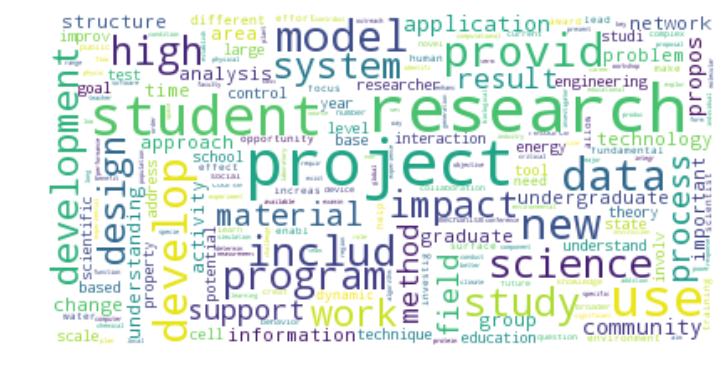

In [55]:
from wordcloud import WordCloud

## Construct token-count dictionary.
token_counts = dict()
for feature, feature_count in zip(features, feature_counts):
    token_counts[feature] = feature_count
    
## Initialize and generate wordcloud from token-counts.
wordcloud = WordCloud(background_color='white', 
                      max_font_size=40).generate_from_frequencies(token_counts)

## Print top 10 tokens.
for k,v in [(k, token_counts[k]) for k in sorted(token_counts, key=token_counts.get, reverse=True)][:10]:
    print('%s: %s' %(k,v))
    
## Generate 
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Next we will load in the metadata associated with the abstracts.

In [56]:
from pandas import read_csv

## Load metadata.
metadata = read_csv(os.path.join('nsf','abstracts_metadata.csv'))
metadata.Directorate.value_counts()

Directorate For Mathematical & Physical Sciences                 27794
Directorate For Engineering                                      25624
Directorate For Computer & Information Sciences & Engineering    19298
Directorate For Geosciences                                      18898
Directorate For Biological Sciences                              15513
Directorate For Social, Behavioral, & Economic Sciences          12282
Directorate For Education and Human Resources                    11105
Office Of The Director                                            3672
Office of Budget, Finance, & Award Management                       16
Office Of Information & Resource Mgmt                               15
Office Of Polar Programs                                             3
National Nanotechnology Coordinating Office                          1
Name: Directorate, dtype: int64

Before fitting the model, we will remove the categories with low counts.

In [57]:
## Define major (frequent) directorate categories.
directorates = [d for d in metadata.Directorate.astype(str).unique() 
                if d.startswith('Directorate') or d.endswith('Director')]

## Reduce sparse matrix & DataFrame to major categories.
ix = np.in1d(metadata.Directorate, directorates)
cmat = cmat[ix]
metadata = metadata.loc[ix].copy()

print(cmat.shape)
metadata.Directorate.value_counts()

(134186, 146663)


Directorate For Mathematical & Physical Sciences                 27794
Directorate For Engineering                                      25624
Directorate For Computer & Information Sciences & Engineering    19298
Directorate For Geosciences                                      18898
Directorate For Biological Sciences                              15513
Directorate For Social, Behavioral, & Economic Sciences          12282
Directorate For Education and Human Resources                    11105
Office Of The Director                                            3672
Name: Directorate, dtype: int64

We should also remove low frequency tokens. Let's visualize how many singletons and near-singletons there are.

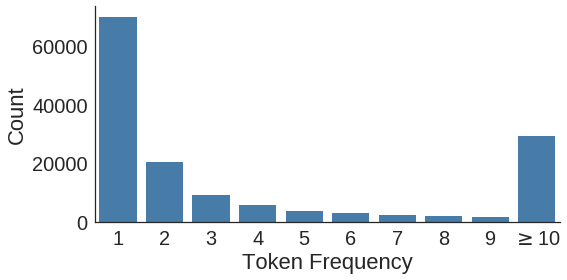

In [58]:
## Digitize frequency counts into bins: 1, 2, 3, ..., 9, >=10
bins = np.arange(10)
cats = np.digitize(feature_counts, bins, right=True)

## Count instances.
bins, counts = np.unique(cats, return_counts=True)

## Visualize.
fig = plt.figure(figsize=(8,4))
ax = sns.barplot(bins, counts, color='#377eb8')
ax.set(xlabel='Token Frequency', ylabel='Count', yticks=[0,2e4,4e4,6e4])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,r'$\geq$10'])
sns.despine()
plt.tight_layout()

Let's remove singletons only, i.e. all tokens occurring only once.

In [59]:
## Find all features occurring only once.
singleton_ix = np.where(feature_counts==1, True, False) 

## Remove from feature names and sparse matrix.
cmat = cmat[:,~singleton_ix]
features = features[~singleton_ix]
cmat.shape

(134186, 76842)

Finally, we will remove all tokens appearing in more than 20% of the documents.

In [60]:
## Find all features appearing in over 25% of the documents.
popular_ix = np.where( (cmat > 0).mean(axis=0) > 0.20, True, False ).squeeze()

## Remove from feature names and sparse matrix.
cmat = cmat[:,~popular_ix]
features = features[~popular_ix]
cmat.shape

(134186, 76772)

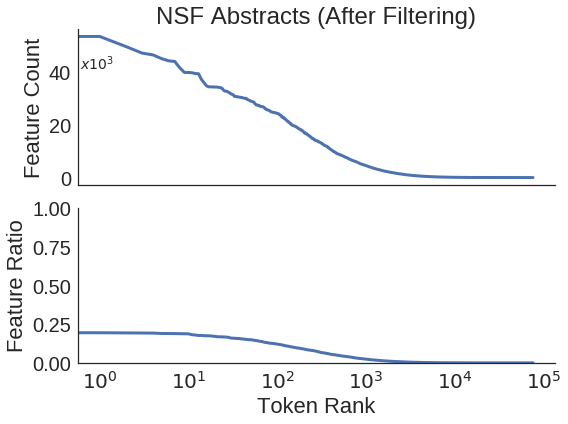

In [61]:
## Plot
fig, axes = plt.subplots(2,1,figsize=(8,6), sharex=True)

## Compute arrays.
feature_counts = np.array( cmat.sum(axis=0) ).squeeze()
feature_ratios = np.array( (cmat > 0).mean(axis=0) ).squeeze()

## Iteratively plot.
for ax, arr in zip(axes, [feature_counts * 1e-3, feature_ratios]):
    ax.plot( np.sort( arr )[::-1], linewidth=3 )
    ax.set(xscale='log')
    
## Fix axes.
axes[0].set(title='NSF Abstracts (After Filtering)', yticks=np.linspace(0,40,3), ylabel='Feature Count')
axes[0].annotate(r"$x10^3$", xy=(0.6, 41), fontsize=14)
axes[1].set(xlabel='Token Rank', ylim=(0,1), yticks=np.linspace(0,1,5), ylabel='Feature Ratio')

sns.despine()
plt.tight_layout()

### Predicting NSF Data: Naive Bayes Classifiers
To predict directorate category from our token data, we will rely on Naive Bayes classificiation. Naive Bayes classification is similar to linear model, but are faster in training and especially efficient for sparse data (such as with text data). They achieve this efficiency by representing the relationship of feature to outcome as the average frequency of observation between a feature and outcome. In the case of binary/multinomial classification, this amounts to counting the number of times a feature appears with a given outcome. Given that computing counts (i.e. summing) is incredibly cheap, Naive Bayes classifers can achieve high efficiency even with high dimensional data.

Naive Bayes classifiers rely on one parameter: alpha. Alpha, as before, is a sparsity parameter that affects model complexity. Increasing levels of alpha instructs the classification algorithm to add additional observations to all of the features, thereby smoothing counts and reducing model complexity. Performance is relatively insensitive to the setting of alpha; however, tuning it usually improves accuracy somewhat.

As before, we will test out several levels of alpha to find an optimal set of model parameters. **NOTE:** This may take several minutes to run. 

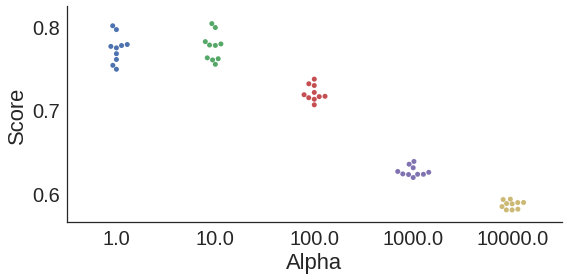

In [62]:
from pandas import DataFrame
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold

## Define variables.
X = cmat
y = metadata.Directorate

## Define alphas.
alphas = np.power(10., np.arange(5))
n_alphas = alphas.shape[0]

## Initialize cross validation method.
n_splits = 10
kfold = StratifiedKFold(n_splits=n_splits)

## Main loop.
scores = np.empty((n_alphas, n_splits))
for n in range(n_alphas):
    
    ## Initialize MultinomialNB
    mnb = MultinomialNB(alpha=alphas[n])
    
    ## Compute scores.
    scores[n] = cross_val_score(mnb, X, y, cv=kfold)

## Assemble into DataFrame. Melt.
df = DataFrame(scores.T, columns=alphas)
df = df.melt(var_name='Alpha', value_name='Score')

## Plot.
fig = plt.figure(figsize=(8,4))
sns.swarmplot('Alpha','Score',data=df)
sns.despine()
plt.tight_layout()

It appears that the out-of-the-box Naive Bayes classifier (i.e. alpha = 1) performs close to the best, if not the best. In any case, higher sparisity values dramatically worsen model performance. Using an 80/20 split, let's fit a classifier to the data and see which tokens best predict each category. 

In [63]:
from sklearn.model_selection import train_test_split

## Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Initialize MultinomialNB
mnb = MultinomialNB(alpha=1)

## Fit model.
mnb_fit = mnb.fit(X_train, y_train)

## Print scores.
print('MultinomialNB train: score = %0.3f' %mnb_fit.score(X_train,y_train))
print('MultinomialNB test: score = %0.3f' %mnb_fit.score(X_test,y_test))

print('Feature count matrix: (%s, %s)' %mnb_fit.feature_count_.shape)
mnb_fit.feature_count_

MultinomialNB train: score = 0.793
MultinomialNB test: score = 0.780
Feature count matrix: (8, 76772)


array([[ 983.,    1.,    0., ...,    0.,    0.,    0.],
       [ 381.,    3.,    0., ...,    0.,    0.,    0.],
       [ 634.,    0.,    0., ...,    0.,    0.,    0.],
       ..., 
       [ 462.,    0.,    1., ...,    0.,    0.,    0.],
       [ 792.,    0.,    0., ...,    0.,    0.,    0.],
       [  54.,    0.,    0., ...,    0.,    0.,    0.]])

In [64]:
## Extract most common features per category.
for n, feature_class in enumerate(mnb_fit.classes_):
    
    ## Get sorted indices of counts.
    ix = np.argsort(mnb_fit.feature_count_[n])[::-1]
    
    ## Print feature class + top 10 features.
    print(feature_class)
    print(' '.join(features[ix][:10]) + '\n' )

Directorate For Biological Sciences
plant specie cell gene protein change biology function genetic mechanism

Directorate For Computer & Information Sciences & Engineering
network software algorithm computer user performance enabl comput computational human

Directorate For Education and Human Resources
teacher school course learn faculty learning engineering mathematics institution college

Directorate For Engineering
engineering energy device cell control cost property enabl power performance

Directorate For Geosciences
change climate ocean water ice region surface global measurement sea

Directorate For Mathematical & Physical Sciences
theory property physic quantum energy state fundamental mathematical equation interaction

Directorate For Social, Behavioral, & Economic Sciences
social policy human change language examin economic public political individual

Office Of The Director
collaboration conduct scientist international experience workshop location engineering early career



As can be seen, the top words per feature class are mixed in terms of their representativeness. Certain tokens seem fairly representative of the top-10 lists to which they belong (e.g. ["plant", "specie", "gene"] for Biological Sciences; ["Education", "Teacher'] for Education and Human Resources). Other tokens appear across the top-10 list for every outcome class and are hardly uniquely representative (e.g. research, project, student). Below, we address some methods of improving this.

### Rescaling Text Data, Part 2
Beyond simple token-frequency scaling, CountVectorizer also allows for **n-gram tokenization.** In n-gram tokenzation, N-pairs of tokens are counted. This can be useful for capturing recurring phrases (e.g. "chaos theory", "dynamical systems", "decision making". This can be set with the ngram_range flag.

A second way of scaling the text employs the **term frequency–inverse document frequency (tf-idf)** method. From Introduction to Machine Learning with Python:
>The intuition of this method is to give high weight to a term that appears
often in a particular document, but not in many documents in the corpus. If a word
appears often in a particular document, but not in very many documents, it is likely
to be very descriptive of the content of that document.

Scikit-learn implements the tf-idf method in two classes, the **TfidfTransformer**,
which takes in the sparse matrix output produced by CountVectorizer and transforms it, or **TfidfVectorizer**, which takes in the text data and does both the bag-of-words
feature extraction and the tf-idf transformation.

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

## Initialize TfidfTransformer.
transformer = TfidfTransformer( )

## Apply to sparse CountVec matrix.
tfidf_mat = transformer.fit_transform(cmat)
print(tfidf_mat)

  (0, 75615)	0.0462825695688
  (0, 72942)	0.126918184899
  (0, 72708)	0.0831776209655
  (0, 71922)	0.0470622161357
  (0, 71055)	0.0715008203505
  (0, 69092)	0.131073629069
  (0, 65407)	0.0869028623572
  (0, 65337)	0.0578645192535
  (0, 65335)	0.0758732096448
  (0, 65249)	0.118835121141
  (0, 65245)	0.0959298648052
  (0, 65109)	0.145840935801
  (0, 64661)	0.0679125935536
  (0, 63181)	0.0483650140661
  (0, 62940)	0.210188123189
  (0, 62831)	0.0806343405683
  (0, 62684)	0.104041144009
  (0, 61114)	0.0399367256136
  (0, 61043)	0.0854122574088
  (0, 61039)	0.078685299894
  (0, 60763)	0.0561641499538
  (0, 58613)	0.0640821056496
  (0, 58605)	0.0481636605141
  (0, 58582)	0.0471068472111
  (0, 57857)	0.123926541693
  :	:
  (134185, 30242)	0.112963188813
  (134185, 29731)	0.0603122261688
  (134185, 29726)	0.13476976488
  (134185, 28105)	0.0841526643483
  (134185, 27375)	0.0750502889922
  (134185, 26926)	0.088375038494
  (134185, 26755)	0.136701399026
  (134185, 26065)	0.0816126033831
  (134185,

Let's directly compare the performance of the two means of normalizing the data.

**NOTE:** This may take a minute to run.

In [66]:
## Initialize cross validation method.
n_splits = 20
kfold = StratifiedKFold(n_splits=n_splits, random_state=0)
    
## Initialize MultinomialNB
mnb = MultinomialNB(alpha=1)
    
## Compute scores.
scores = np.empty((n_splits,2))
scores[:,0]= cross_val_score(mnb, cmat, y, cv=kfold)         # CountVec
scores[:,1]= cross_val_score(mnb, tfidf_mat, y, cv=kfold)    # TF-IDF

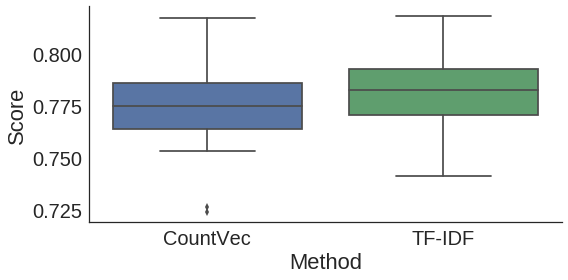

In [67]:
## Assemble into DataFrame. Melt.
df = DataFrame(scores, columns=['CountVec','TF-IDF'])
df = df.melt(var_name='Method', value_name='Score')

## Plot.
fig = plt.figure(figsize=(8,4))
sns.boxplot('Method','Score',data=df)
sns.despine()
plt.tight_layout()

Let's show the most representative tokens now.

In [68]:
## Define variables.
X = tfidf_mat
y = metadata.Directorate

## Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Initialize MultinomialNB
mnb = MultinomialNB(alpha=1)

## Fit model.
mnb_fit = mnb.fit(X_train, y_train)

## Print scores.
print('MultinomialNB train: score = %0.3f' %mnb_fit.score(X_train,y_train))
print('MultinomialNB test: score = %0.3f' %mnb_fit.score(X_test,y_test))

MultinomialNB train: score = 0.796
MultinomialNB test: score = 0.784


In [69]:
## Extract most common features per category.
for n, feature_class in enumerate(mnb_fit.classes_):
    
    ## Get sorted indices of counts.
    ix = np.argsort(mnb_fit.feature_count_[n])[::-1]
    
    ## Print feature class + top 10 features.
    print(feature_class)
    print(' '.join(features[ix][:10]) + '\n' )

Directorate For Biological Sciences
plant specie gene protein cell biology genetic change animal ecosystem

Directorate For Computer & Information Sciences & Engineering
network software algorithm computer user comput performance security computational communication

Directorate For Education and Human Resources
teacher faculty course learning school learn mathematics engineering college institution

Directorate For Engineering
engineering device energy cell cost control industry power sensor performance

Directorate For Geosciences
climate ocean ice change water sea region mantle carbon surface

Directorate For Mathematical & Physical Sciences
theory physic property quantum equation mathematical geometry conference energy molecule

Directorate For Social, Behavioral, & Economic Sciences
social policy language political human economic decision examin change people

Office Of The Director
location collaboration orientation introduction counterpart culture foreign language hand scienc



As can be seen, many of the tokens of each directorates' top-10 list are more representative of its respective discipline. 

### Topic Modeling

In [70]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
sns.set_style('white')
sns.set_context('notebook', font_scale=2)
%matplotlib inline

## Load data.
features = np.load(os.path.join('nsf','NSF_lda_features.npy'))
document_loadings = np.load(os.path.join('nsf','NSF_lda_document_loadings.npy'))
feature_loadings = np.load(os.path.join('nsf','NSF_lda_feature_loadings.npy'))
n_docs, n_topics = document_loadings.shape
n_topics, n_features = feature_loadings.shape
print('Docs = %s, Features = %s, Topics = %s' %(n_docs, n_features, n_topics))

Docs = 134244, Features = 71610, Topics = 100


In [71]:
## Find and display most representative 10 features for every
## 10th topic.
for i in range(0,n_topics,10):
    
    ## Get indices of most representative features per topic.
    ix = np.argsort( feature_loadings[i] )[::-1]
    
    ## Print.
    print( 'Topic %0.2d: %s' %(i, ', '.join(features[ix][:10])) )

Topic 00: code, error, big, storage, hard, binary, disk, rational, respectively, blend
Topic 10: control, feedback, robot, vehicle, heterogeneous, safety, robotics, connectivity, autonomous, instability
Topic 20: visualization, coral, trade, off, reef, candidate, iterative, accommod, mesh, trophic
Topic 30: cell, plant, gene, genetic, molecular, biology, genome, identifi, organism, expression
Topic 40: surface, dimensional, three, deformation, depth, snow, fold, two, topography, lateral
Topic 50: database, query, geo, annot, savanna, pelagic, legume, woody, landmark, freeze
Topic 60: change, climate, ocean, ecosystem, water, ice, environmental, sea, marine, global
Topic 70: device, of, art, state, the, enabl, architecture, optical, circuit, chip
Topic 80: social, policy, practice, public, individual, political, state, people, organization, examin
Topic 90: quantum, physic, mechanic, bridge, scalability, classical, double, many, clock, conformal


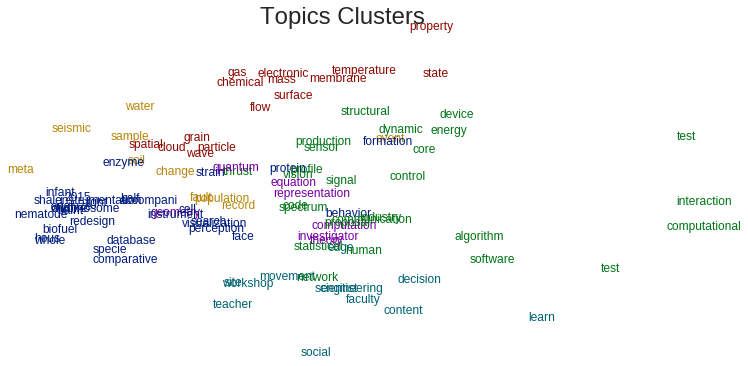

In [79]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define useful functions.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

def dot_self(arr):
    return np.dot(arr, arr)

def cosine(arr1, arr2):
    return np.dot(arr1,arr2) / ( np.sqrt(dot_self(arr1)) * np.sqrt(dot_self(arr2)) )

def jitter_pos(pos, i, scale=1e-1, threshold=1.1, seed=47404):
    ## Make copies.
    copy, xy = np.delete(pos, i, 0), pos[i]
    ## Compute inverse-RMS distance.
    dist_pre = np.sqrt( np.mean( 1. / np.power(copy - xy, 2) ) )
    ## Append distance from center.
    xy += (xy - np.median(topic_pca,axis=0)) * scale
    dist_post = np.sqrt( np.mean( 1. / np.power(copy - xy, 2) ) )
    if dist_pre / dist_post > threshold  : pos[i] = xy
    return pos

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Compute similarity matrix.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Preallocate space.
topic_similarity = np.zeros((n_topics,n_topics))

## Construct for loop that fills in upper triangular matrix.
for i in range(0, n_topics-1):
    for j in range(i+1, n_topics):
        topic_similarity[i,j] = cosine(document_loadings[:,i], document_loadings[:,j])
        
## Symmetrize matrix.
topic_similarity = topic_similarity + topic_similarity.T

## Check for symmetrix.
# np.all(topic_similarity == topic_similarity.T)

## Fill in diagonal with ones.
topic_similarity[np.diag_indices_from(topic_similarity)] += 1

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Perform clustering.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize PCA.
pca = PCA(n_components=2)

## Fit and transform.
topic_pca = pca.fit_transform(topic_similarity)

## Initialize K-means.
kmeans = KMeans(n_clusters=8, random_state=0)

## Fit.
kmeans_fit = kmeans.fit(topic_similarity)
topic_kmeans = kmeans_fit.predict(topic_similarity)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig, ax = plt.subplots(1,1,figsize=(12,6))
colors = sns.color_palette('dark', n_colors=8)

## Jitter positions.
for _ in range(250):
    for i in range(n_topics):
        topic_pca = jitter_pos(topic_pca,i,scale=0.01)

## Plotting.
for i in range(n_topics):
    ax.text(topic_pca[i,0], topic_pca[i,1], features[np.argmax(feature_loadings[i])],
            color=colors[topic_kmeans[i]], fontsize=12)

## Fix axes.
xmin, ymin = topic_pca.min(axis=0)
xmax, ymax = topic_pca.max(axis=0)
ax.set(xlim=(xmin, xmax), xticks=[], ylim=(ymin, ymax), yticks=[], title='Topics Clusters')
ax.axes.set_axis_off()

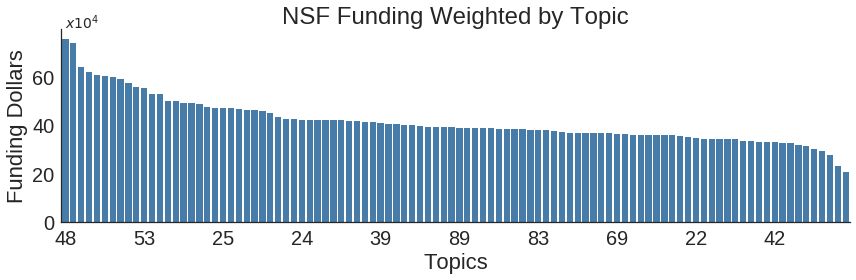

In [92]:
from pandas import read_csv
metadata = read_csv(os.path.join('nsf','abstracts_metadata.csv'))

## Compute grant funding weighted by topic.
funding = [np.average(metadata.Funds, weights=document_loadings[:,n]) for n in range(n_topics)]

## Sort in descending order.
funding_ix = np.argsort(funding)[::-1]
funding = np.array(funding)[funding_ix]

## Plot.
fig = plt.figure(figsize=(12,4))
ax = sns.barplot(x=np.arange(n_topics), y=funding*1e-4, color='#377eb8')
ax.set(xticks=np.arange(0,n_topics,10), xticklabels=funding_ix[::10], xlabel='Topics',
       ylabel='Funding Dollars', title='NSF Funding Weighted by Topic')
ax.text(0,80,r'$x10^4$', fontsize=14)

sns.despine()
plt.tight_layout()

In [93]:
## Display top-10 most funded topics.
for i in funding_ix[:10]:
    
    ## Get indices of most representative features per topic.
    ix = np.argsort( feature_loadings[i] )[::-1]
    
    ## Print.
    print( 'Topic %0.2d: %s' %(i, ', '.join(features[ix][:10])) )

Topic 48: instrumentation, acquisition, maintenance, intelligent, vessel, capability, item, pool, ship, oper
Topic 08: teacher, school, mathematics, classroom, professional, teach, secondary, curriculum, rural, learn
Topic 82: instrument, center, facility, fellowship, month, geoscience, geosciences, volcano, campus, side
Topic 05: faculty, institution, college, university, mentor, peer, member, particip, national, galaxy
Topic 49: particle, matter, physic, energy, answer, detector, elementary, ray, dark, question
Topic 46: engineering, career, underrepresented, minority, school, woman, experience, summer, participation, degree
Topic 04: learn, learning, course, team, based, educational, knowledge, skill, environment, practice
Topic 27: event, wind, observation, long, region, term, near, team, physical, effort
Topic 86: software, user, security, service, comput, infrastructure, mobile, enabl, computer, platform
Topic 43: accompani, cruise, empow, rarely, sulfide, hybridization, spark, l

In [154]:
from pandas import DataFrame
    
## Turn document loadings into DataFrame.
colnames = ['Topic%0.2d' %n for n in range(n_topics)]
loadings = DataFrame(document_loadings, columns=colnames)

## Merge with metadata.
info = metadata.merge(loadings, left_index=True, right_index=True)

## Melt DataFrame.
info = info.melt(id_vars=['Year','Funds'], value_vars=colnames, 
                 var_name='Topic', value_name='Loading')

## GroupBy Year and Topic.
gb = info.groupby(['Year','Topic'])

## Compute weighted average.
wa = gb.apply(lambda x: np.average(x.Funds, weights=x.Loading))

## Convert to longlist.
wa = wa.unstack().reset_index().melt(id_vars='Year', value_name='WA')
wa.head(5)

,Year,Topic,WA
0,2006,Topic00,376617.795419
1,2007,Topic00,437809.622999
2,2008,Topic00,337206.825189
3,2009,Topic00,396229.398223
4,2010,Topic00,413456.196169
